In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)
!pip install imblearn
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Load the dataset
file_path = 'framingham.csv'
data = pd.read_csv(file_path)

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# Handle missing values by imputing the median
data.fillna(data.median(numeric_only=True), inplace=True)

In [ ]:
# Define features and target variable
X = data.drop(columns=["TenYearCHD"])
y = data["TenYearCHD"]

In [ ]:
# Standardize numerical features for uniformity
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

In [ ]:
# Train logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict on the test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       720
           1       0.68      0.68      0.68       719

    accuracy                           0.68      1439
   macro avg       0.68      0.68      0.68      1439
weighted avg       0.68      0.68      0.68      1439



In [ ]:
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

ROC-AUC Score: 0.73


In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict on the test set
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       720
           1       0.90      0.90      0.90       719

    accuracy                           0.90      1439
   macro avg       0.90      0.90      0.90      1439
weighted avg       0.90      0.90      0.90      1439



In [ ]:
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_prob):.2f}")

ROC-AUC Score: 0.97


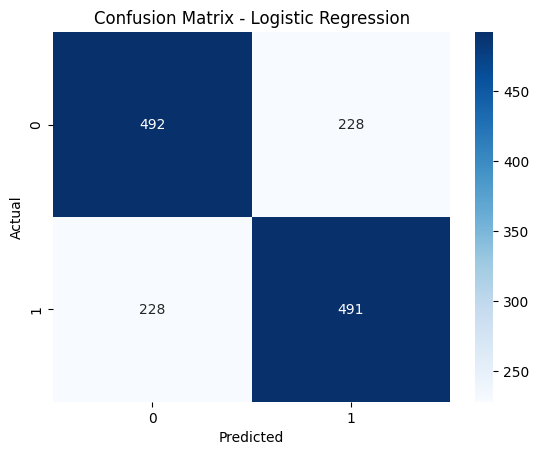

In [ ]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

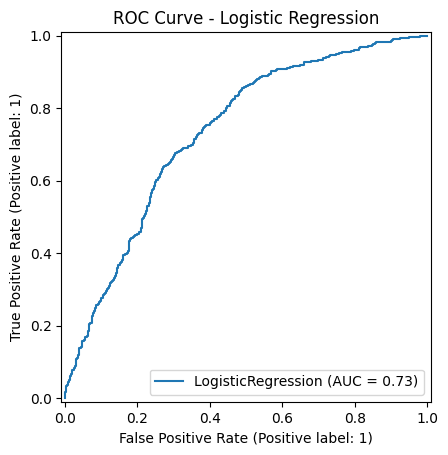

In [ ]:
# ROC Curve for Logistic Regression
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

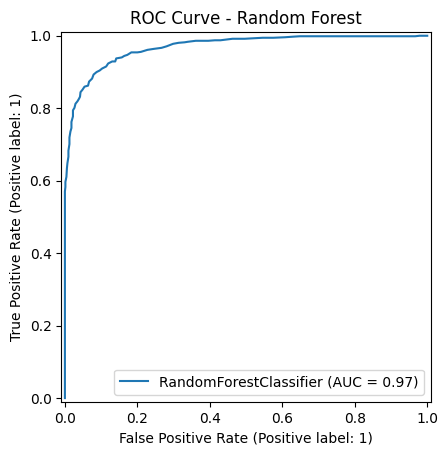

In [ ]:
# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

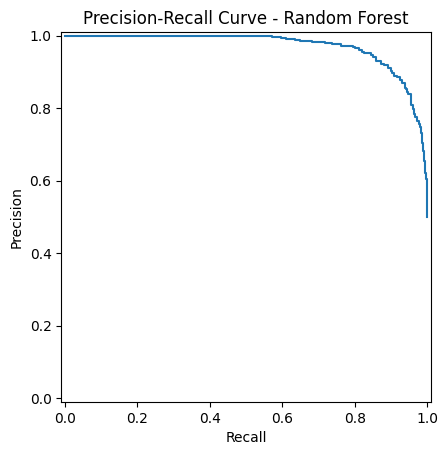

In [ ]:
# Precision-Recall Curve for Random Forest
precision, recall, _ = precision_recall_curve(y_test, rf_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve - Random Forest")
plt.show()

In [ ]:
print("Summary of Model Performance:")
print("\nLogistic Regression:")
print(f"Accuracy: {log_reg.score(X_test, y_test):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

print("\nRandom Forest:")
print(f"Accuracy: {rf_model.score(X_test, y_test):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_prob):.2f}")

Summary of Model Performance:

Logistic Regression:
Accuracy: 0.68
ROC-AUC Score: 0.73

Random Forest:
Accuracy: 0.90
ROC-AUC Score: 0.97
